<a href="https://colab.research.google.com/github/sbhosale0701/LGMDSTasks/blob/main/Task_3Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-3: Develop A Neural Network That Can Read Handwriting

In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy as sp
import datetime
import warnings
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings("ignore")
%matplotlib inline

In [24]:
train=pd.read_csv("mnist_train.csv")
test=pd.read_csv("mnist_test.csv")

In [25]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [28]:
train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [31]:
test.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [33]:
train.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [34]:
test.value_counts()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  1x11  1x12  1x13  1x14  1x15  1x16  1x17  1x18  1x19  1x20  1x21  1x22  1x23  1x24  1x25  1x26  1x27  1x28  2x1  2x2  2x3  2x4  2x5  2x6  2x7  2x8  2x9  2x10  2x11  2x12  2x13  2x14  2x15  2x16  2x17  2x18  2x19  2x20  2x21  2x22  2x23  2x24  2x25  2x26  2x27  2x28  3x1  3x2  3x3  3x4  3x5  3x6  3x7  3x8  3x9  3x10  3x11  3x12  3x13  3x14  3x15  3x16  3x17  3x18  3x19  3x20  3x21  3x22  3x23  3x24  3x25  3x26  3x27  3x28  4x1  4x2  4x3  4x4  4x5  4x6  4x7  4x8  4x9  4x10  4x11  4x12  4x13  4x14  4x15  4x16  4x17  4x18  4x19  4x20  4x21  4x22  4x23  4x24  4x25  4x26  4x27  4x28  5x1  5x2  5x3  5x4  5x5  5x6  5x7  5x8  5x9  5x10  5x11  5x12  5x13  5x14  5x15  5x16  5x17  5x18  5x19  5x20  5x21  5x22  5x23  5x24  5x25  5x26  5x27  5x28  6x1  6x2  6x3  6x4  6x5  6x6  6x7  6x8  6x9  6x10  6x11  6x12  6x13  6x14  6x15  6x16  6x17  6x18  6x19  6x20  6x21  6x22  6x23  6x24  6x25  6x26  6x27  6x28  7x1  7x2  7x3  7x4  7x5  7x6  7x7  7x8 

In [35]:
train.dtypes

label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object

In [36]:
X=train.drop(['label'],axis=1).values
Y=train["label"].values

In [37]:
train.corr()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
label,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031072,0.023052,0.018715,0.013481,0.009340,0.005085,NaN,NaN,NaN,NaN
1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1x3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1x4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28x24,0.005085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000191,-0.000130,-0.000093,0.206563,0.855512,1.000000,NaN,NaN,NaN,NaN
28x25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28x26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28x27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
test.corr()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
label,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033682,0.027747,0.021902,0.015736,NaN,NaN,NaN,NaN,NaN,NaN
1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1x3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1x4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28x24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28x25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28x26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28x27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EXPLORATORY DATA ANALYSIS

<Axes: ylabel='Count'>

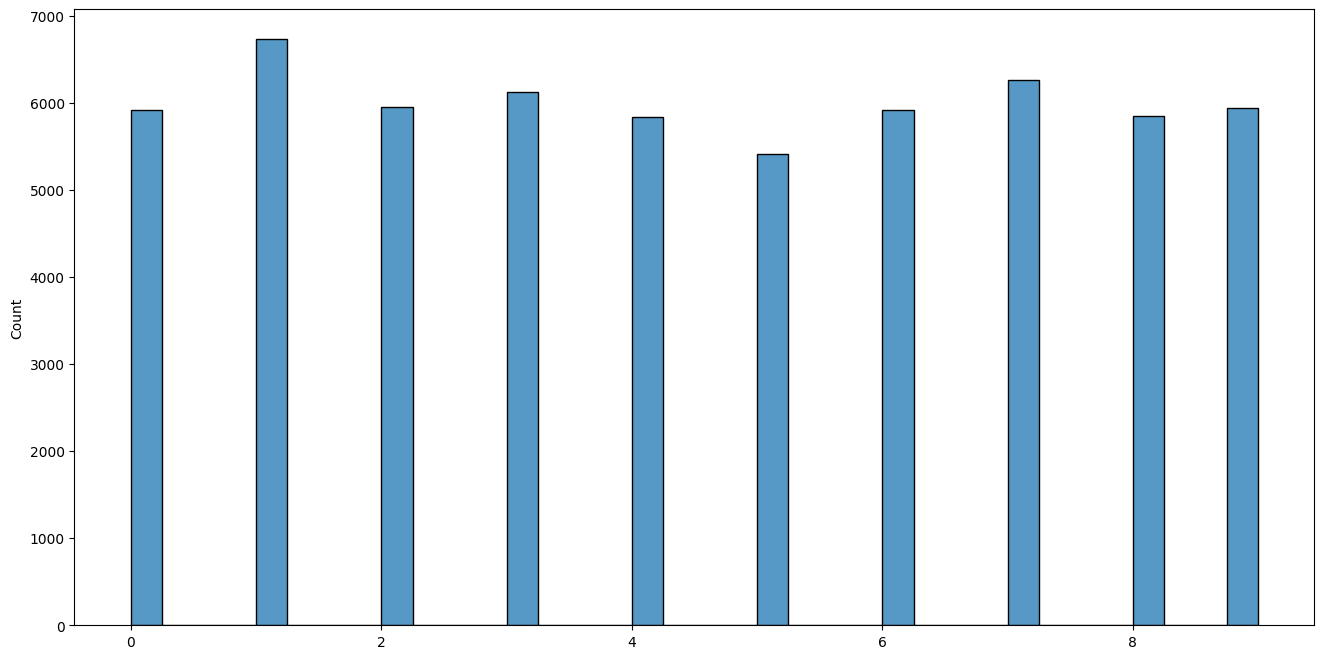

In [39]:
plt.figure(figsize=(16,8))
sns.histplot(Y)

<Axes: ylabel='Density'>

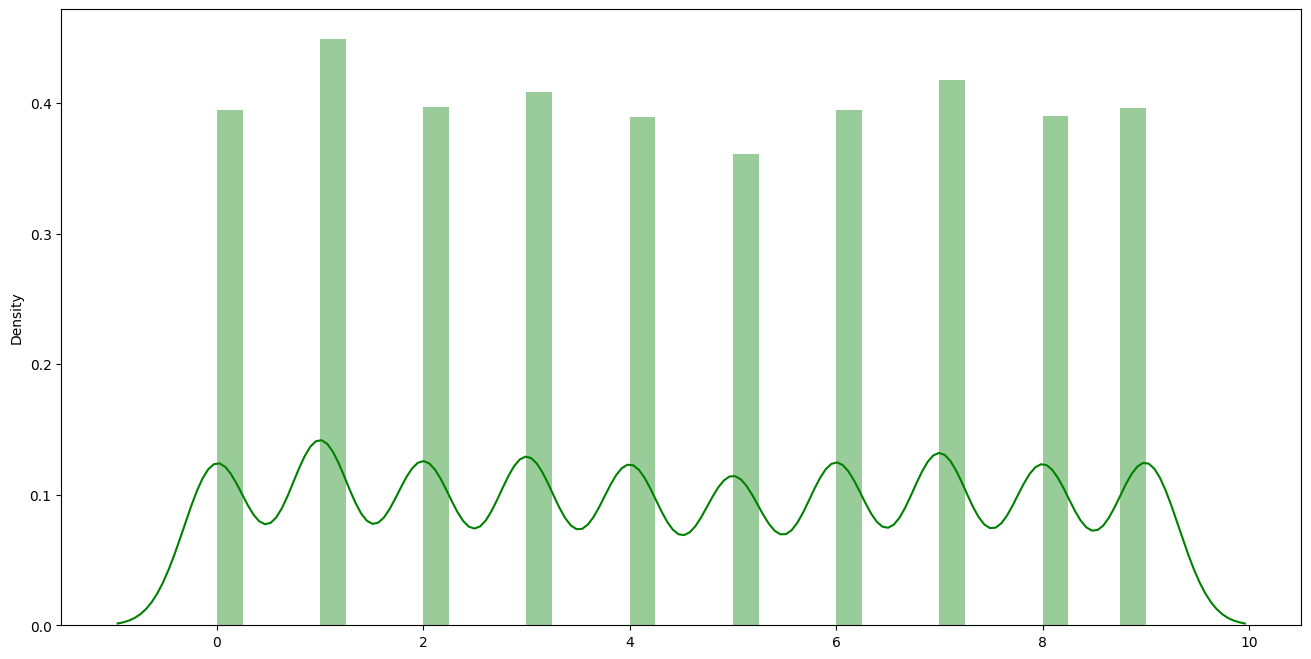

In [40]:
plt.figure(figsize=(16,8))
sns.distplot(Y,color='g')

<Axes: ylabel='Density'>

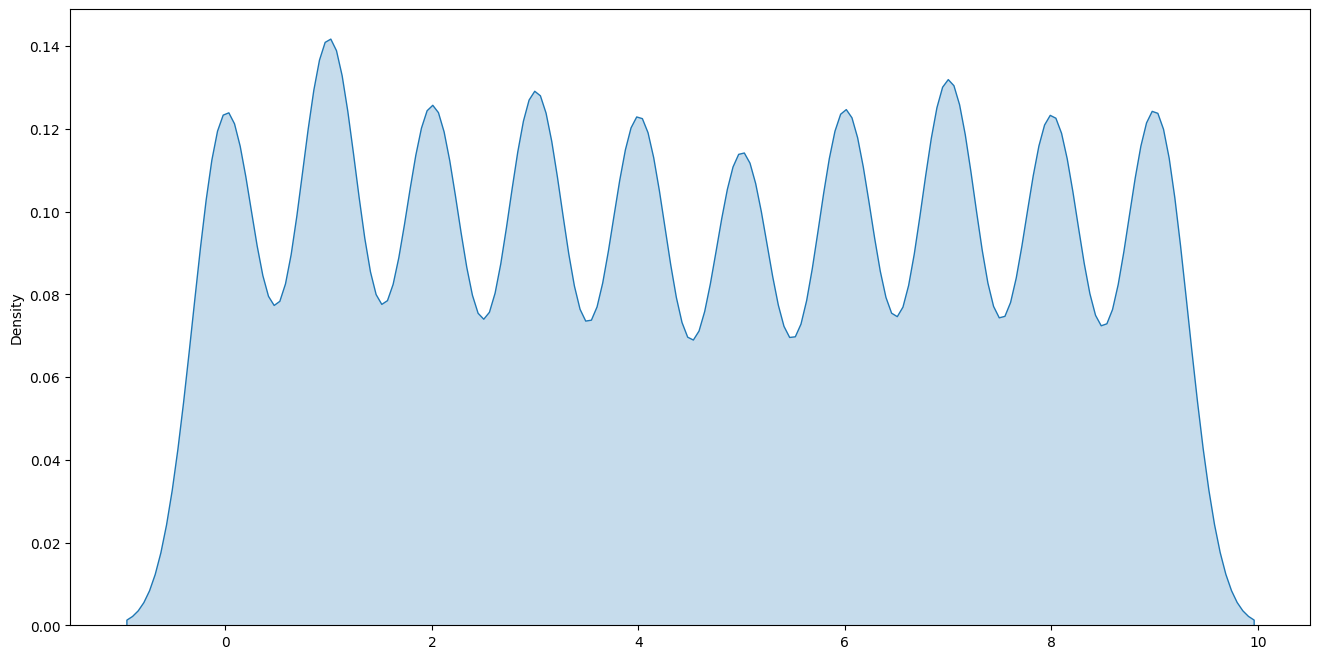

In [41]:
plt.figure(figsize=(16,8))
sns.kdeplot(Y,shade=True)

<Axes: >

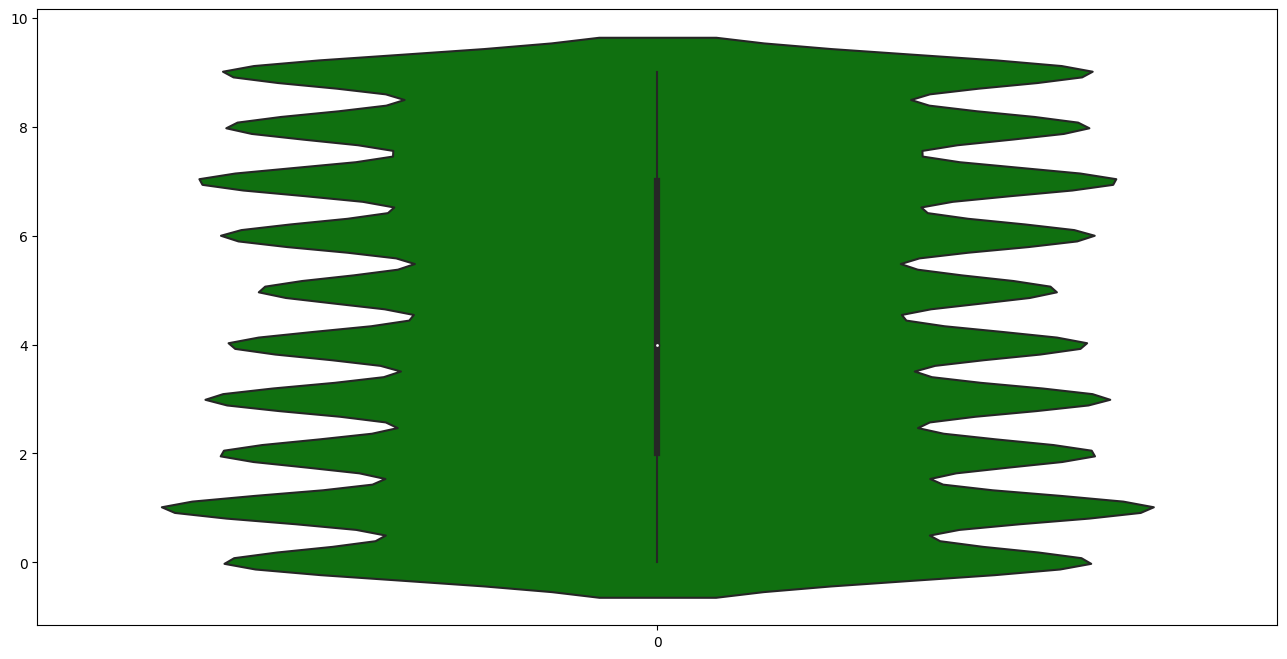

In [42]:
plt.figure(figsize=(16,8))
sns.violinplot(Y,color='g')

<Axes: ylabel='count'>

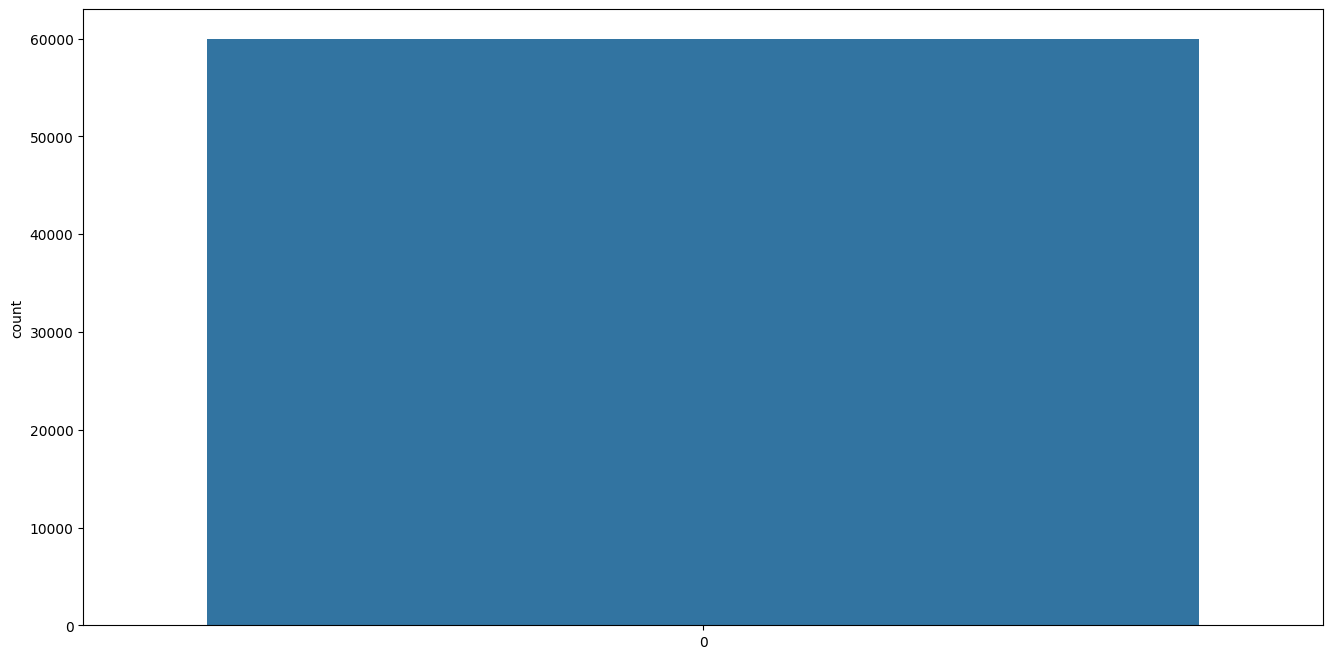

In [43]:
plt.figure(figsize=(16,8))
sns.countplot(Y)

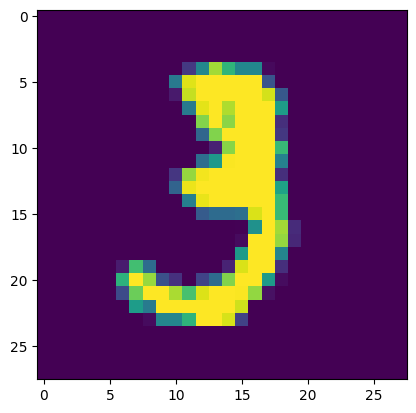

In [44]:
plt.imshow(X[10].reshape([28,28]))

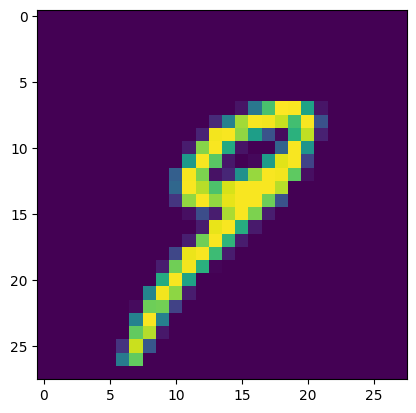

In [45]:
plt.imshow(X[1455].reshape([28,28]))

In [49]:
X= X.reshape([60000,28,28,1])
Y=Y.reshape([60000,1])

In [50]:
from keras.utils.np_utils import to_categorical
Y=to_categorical(Y,num_classes=10)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y, random_state=10,test_size=0.1)

In [52]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(65,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Conv2D(65,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [53]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [54]:
history=model.fit(x_train,y_train,batch_size=256,
                   epochs=20
                   )

Epoch 1/20
211/211 [==============================] - 205s 960ms/step - loss: 0.3450 - binary_accuracy: 0.9147
Epoch 2/20
211/211 [==============================] - 202s 959ms/step - loss: 0.0692 - binary_accuracy: 0.9795
Epoch 3/20
211/211 [==============================] - 200s 950ms/step - loss: 0.0371 - binary_accuracy: 0.9895
Epoch 4/20
211/211 [==============================] - 201s 955ms/step - loss: 0.0267 - binary_accuracy: 0.9926
Epoch 5/20
211/211 [==============================] - 203s 961ms/step - loss: 0.0221 - binary_accuracy: 0.9937
Epoch 6/20
211/211 [==============================] - 204s 967ms/step - loss: 0.0188 - binary_accuracy: 0.9948
Epoch 7/20
211/211 [==============================] - 202s 957ms/step - loss: 0.0176 - binary_accuracy: 0.9950
Epoch 8/20
211/211 [==============================] - 204s 969ms/step - loss: 0.0158 - binary_accuracy: 0.9955
Epoch 9/20
211/211 [==============================] - 202s 959ms/step - loss: 0.0144 - binary_accuracy: 0.9960
E

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 65)        650       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 65)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 65)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 65)        38090     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 65)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 65)          0

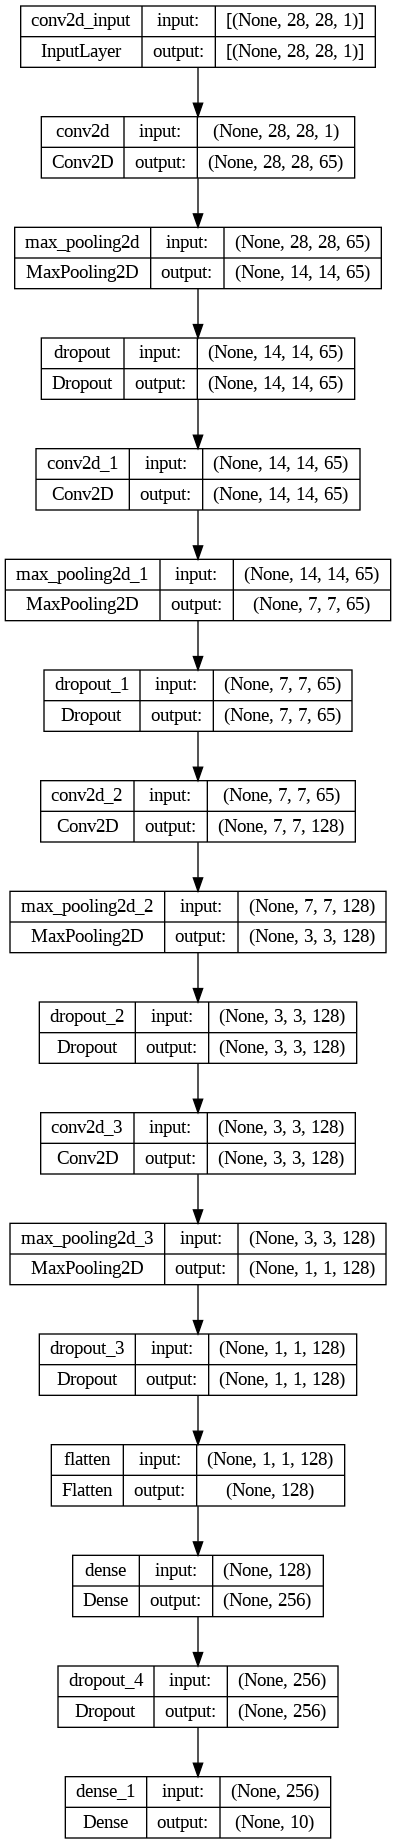

In [56]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [57]:
y_pred=model.predict(x_test)
y_pred

188/188 [==============================] - 7s 34ms/step


array([[1.8086522e-24, 1.6843320e-24, 4.8486639e-18, ..., 2.1755718e-20,
        1.7987419e-19, 1.5959938e-19],
       [4.3307959e-23, 3.2869167e-28, 1.6042958e-26, ..., 6.3755176e-25,
        9.0452975e-20, 1.7901500e-20],
       [9.9999994e-01, 2.9751450e-17, 2.0533533e-16, ..., 7.1439164e-18,
        6.1120434e-14, 6.0978289e-13],
       ...,
       [1.4260036e-18, 3.7881396e-22, 2.8395379e-20, ..., 4.5514547e-20,
        4.4726002e-16, 6.6389844e-16],
       [1.9037445e-09, 2.6988866e-08, 9.9999982e-01, ..., 3.9343917e-08,
        1.3932057e-08, 8.9719387e-10],
       [1.7127363e-25, 2.0835641e-25, 2.4450561e-18, ..., 7.0869329e-21,
        1.1924112e-19, 2.5541770e-20]], dtype=float32)

In [58]:
print(y_pred>0.5)

[[False False False ... False False False]
 [False False False ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]]


<Axes: >

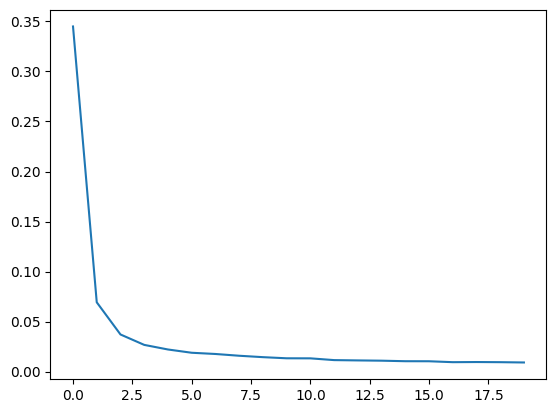

In [59]:
history_df=pd.DataFrame(history.history)
history_df['loss'].plot()

In [60]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 7s 35ms/step - loss: 0.0067 - binary_accuracy: 0.9983


[0.006743886508047581, 0.9983164072036743]

Conclusion:
So, we got a good accuracy of 99% keeping epchos as 20 and batch size as 256